In [15]:
# scratch code to get ocn forcing .nc files

#from datetime import datetime

import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import matplotlib.pyplot as plt
#import numpy as np
#import scipy.ndimage as ndimage
#import xarray as xr
#import netCDF4 as nc
#from scipy.interpolate import RegularGridInterpolator


In [ ]:


sys.path.append('/Users/mspydell/research/FF2024/models/SDPM_mss/PFM/sdpm_py_util')

import atm_functions as atmfuns
import ocn_functions as ocnfuns
import grid_functions as grdfuns

# comment to test git from swell
# comment to test git again.
# 3rd comment to test git.
# 4th cemment to test git.

In [2]:
run_type = 'forecast'
# the year, month, day of the 
yyyymmdd='20240706'
# the hour in Z of the forecast, hycom has forecasts once per day starting at 1200Z
hhmm='1200'
# we will use hycom for IC and BC
ocn_mod = 'hycom'
# we will use nam_nest for the atm forcing
atm_mod = 'nam_nest'
# we will use opendap, and netcdf to grab ocn, and atm data
get_method = 'open_dap_nc'

# get the ROMS grid as a dict
fngr = '/Users/mspydell/research/FF2024/models/SDPM_mss/PFM_user/grids/GRID_SDTJRE_LV1.nc'
RMG = grdfuns.roms_grid_to_dict(fngr)


In [4]:
# make the atm .nc file here.
# fn_out is the name of the atm.nc file used by roms
fn_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/atm_test_file_v2.nc'
# make a switch to see if this file exists. If it exists, we don't need to run the code in this block
# first the atm data
# get the data as a dict
# need to specify hhmm because nam forecast are produced at 6 hr increments
ATM = atmfuns.get_atm_data_as_dict(yyyymmdd,hhmm,run_type,atm_mod,get_method)
# put in a function to check to make sure that all the data is good
# put in a function to plot the raw atm data if we want to
# put the atm data on the roms grid, and rotate the velocities
# everything in this dict turn into the atm.nc file
ATM_R  = atmfuns.get_atm_data_on_roms_grid(ATM,RMG)
# output a netcdf file of ATM_R
atmfuns.atm_roms_dict_to_netcdf(ATM_R,fn_out)
# put in a function to plot the atm.nc file if we want to

getting atm forecast for:
[datetime.datetime(2024, 7, 6, 12, 0) datetime.datetime(2024, 7, 6, 15, 0)
 datetime.datetime(2024, 7, 6, 18, 0) datetime.datetime(2024, 7, 6, 21, 0)
 datetime.datetime(2024, 7, 7, 0, 0) datetime.datetime(2024, 7, 7, 3, 0)
 datetime.datetime(2024, 7, 7, 6, 0) datetime.datetime(2024, 7, 7, 9, 0)
 datetime.datetime(2024, 7, 7, 12, 0) datetime.datetime(2024, 7, 7, 15, 0)
 datetime.datetime(2024, 7, 7, 18, 0) datetime.datetime(2024, 7, 7, 21, 0)
 datetime.datetime(2024, 7, 8, 0, 0) datetime.datetime(2024, 7, 8, 3, 0)
 datetime.datetime(2024, 7, 8, 6, 0) datetime.datetime(2024, 7, 8, 9, 0)
 datetime.datetime(2024, 7, 8, 12, 0) datetime.datetime(2024, 7, 8, 15, 0)
 datetime.datetime(2024, 7, 8, 18, 0) datetime.datetime(2024, 7, 8, 21, 0)
 datetime.datetime(2024, 7, 9, 0, 0)]
<xarray.Dataset>
Dimensions:     (tair_time: 21, er: 390, xr: 253, pair_time: 21, qair_time: 21,
                 wind_time: 21, rain_time: 21, srf_time: 21, lrf_time: 21,
                 time:

In [6]:
# make the ocn IC and BC .nc files here
# fn*_out are the names of the the IC.nc and BC.nc roms files
fn_ic_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_test_IC_file.nc'
fn_bc_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_test_BC_file.nc'

# note, this function is hard wired to return 2.5 days of data
# also note that the first time of this data is yyyymmdd 12:00Z
# so we grab nam atm forecast data starting at this hour too.
OCN = ocnfuns.get_ocn_data_as_dict(yyyymmdd,run_type,ocn_mod,get_method)
# note this takes 24.5 minutes to run on my laptop
# 3 times this timed out
# will likely need to use a wget method and directly download .nc files (arh)
# maybe downloading the netcdf file would be quicker? 


### should work to here! ####


Note:Caching=1


ocn forecast data is being grabbed for:
[datetime.datetime(2024, 7, 3, 12, 0) datetime.datetime(2024, 7, 3, 15, 0)
 datetime.datetime(2024, 7, 3, 18, 0) datetime.datetime(2024, 7, 3, 21, 0)
 datetime.datetime(2024, 7, 4, 0, 0) datetime.datetime(2024, 7, 4, 3, 0)
 datetime.datetime(2024, 7, 4, 6, 0) datetime.datetime(2024, 7, 4, 9, 0)
 datetime.datetime(2024, 7, 4, 12, 0) datetime.datetime(2024, 7, 4, 15, 0)
 datetime.datetime(2024, 7, 4, 18, 0) datetime.datetime(2024, 7, 4, 21, 0)
 datetime.datetime(2024, 7, 5, 0, 0) datetime.datetime(2024, 7, 5, 3, 0)
 datetime.datetime(2024, 7, 5, 6, 0) datetime.datetime(2024, 7, 5, 9, 0)
 datetime.datetime(2024, 7, 5, 12, 0) datetime.datetime(2024, 7, 5, 15, 0)
 datetime.datetime(2024, 7, 5, 18, 0) datetime.datetime(2024, 7, 5, 21, 0)]


In [12]:
# save the OCN dict so that we can restart the python session
# and not have to worry about opendap timing out
with open(fnout,'wb') as fp:
    pickle.dump(OCN,fp)
    print('OCN dict saved with pickle')

OCN dict saved with pickle


In [3]:
fnout='/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_hycom_dict_file.pkl'

with open(fnout,'rb') as fp:
    OCN = pickle.load(fp)

# put the ocn data on the roms grid
OCN_R  = ocnfuns.hycom_to_roms_latlon(OCN,RMG)


In [13]:
print(RMG.keys())
Hu = 0.5 * (RMG['h'][:,1:-1:1] + RMG['h'][:,0:-2:1])
Hv = 0.5 * (RMG['h'][0:-2:1,:] + RMG['h'][1:-1:1,:])


dict_keys(['lon_rho', 'lat_rho', 'lon_u', 'lat_u', 'lon_v', 'lat_v', 'h', 'mask_rho', 'mask_u', 'mask_v', 'angle', 'angle_u', 'angle_v'])


(20, 40, 390, 253)
30.66954364208219
-116.06762879572817
[[39]]
[[5000.]]
16.631999999999998
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]]


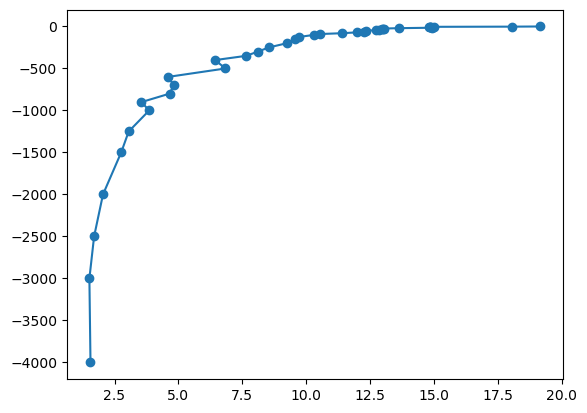

In [26]:
fig, ax = plt.subplots()
yy = OCN_R['depth'][:]
ilat = 20
ilon = 245
print(np.shape(OCN_R['temp']))
xx = OCN_R['temp'][0,:,ilat,ilon]
ax.plot(xx,-yy,'-o')

ib = np.argwhere(np.isnan(xx))
ig = np.argwhere(np.isfinite(xx))

print(RMG['lat_rho'][ilat,ilon])
print(RMG['lon_rho'][ilat,ilon])
print(ib)
print(yy[ib])
print(RMG['h'][ilat,ilon])

print(ig)



In [ ]:

OCN_Rz = ocnfuns.ocn_r_hycomz_2_romsz(OCN_R,RMG)



In [ ]:

# output OCN_R dict to roms IC
ocn_roms_dict_to_IC_netcdf
# ouput OCN_R dict to roms BC
ocn_roms_dict_to_BC_netcdf



In [ ]:
make_roms_dotin
make_slurm_script
run_slurm_script